# Giới thiệu 📌

Bài học này và bài học tiếp theo sử dụng các thuật toán *unsupervised learning* (học không giám sát). Các thuật toán không giám sát không sử dụng một biến mục tiêu; thay vào đó, chúng có nhiệm vụ học một số đặc tính của dữ liệu, nhằm biểu diễn cấu trúc của các đặc trưng theo một cách nhất định. Trong bối cảnh kỹ thuật đặc trưng (*feature engineering*) phục vụ dự đoán, bạn có thể coi thuật toán không giám sát như một kỹ thuật "khám phá đặc trưng" (*feature discovery*).

**Clustering** (phân cụm) đơn giản có nghĩa là việc gán các điểm dữ liệu vào các nhóm dựa trên mức độ tương đồng giữa chúng. Một thuật toán phân cụm làm cho "những con chim cùng đàn bay cùng nhau" 🐦➡️🐦.

Khi được sử dụng cho kỹ thuật đặc trưng, chúng ta có thể tìm cách khám phá các nhóm khách hàng đại diện cho một phân khúc thị trường, hoặc các khu vực địa lý có kiểu thời tiết tương tự nhau 🌍🌦️. Việc thêm một đặc trưng mang nhãn cụm (*cluster labels*) có thể giúp các mô hình Machine Learning làm sáng tỏ các mối quan hệ phức tạp về không gian hoặc sự gần kề.

---

# Nhãn cụm như một đặc trưng 🔖

Khi áp dụng lên một đặc trưng số thực duy nhất, phân cụm hoạt động giống như một phương pháp "chia khoảng" (*binning*) truyền thống hoặc ["rời rạc hóa" (*discretization*)](https://scikit-learn.org/stable/auto_examples/preprocessing/plot_discretization_classification.html). Khi áp dụng lên nhiều đặc trưng, nó giống như "chia khoảng đa chiều" (*multi-dimensional binning*), đôi khi còn được gọi là *vector quantization*.

<figure style="padding: 1em;">
<img src="sr3pdYI.png" width=800, alt="">
<figcaption style="textalign: center; font-style: italic"><center><strong>Trái:</strong> Phân cụm một đặc trưng. <strong>Phải:</strong> Phân cụm trên hai đặc trưng.</center></figcaption>
</figure>

Khi được thêm vào một dataframe, một đặc trưng nhãn cụm có thể trông như sau:

| Kinh độ (Longitude) | Vĩ độ (Latitude) | Cụm (Cluster) |
|---------------------|------------------|---------------|
| -93.619           | 42.054           | 3             |
| -93.619           | 42.053           | 3             |
| -93.638           | 42.060           | 1             |
| -93.602           | 41.988           | 0             |



# Quan trọng ❗

Hãy nhớ rằng đặc trưng `Cluster` là một biến phân loại (*categorical feature*). Trong ví dụ này, nó được biểu diễn dưới dạng **label encoding** (mã hóa nhãn) – tức là một dãy số nguyên – như cách mà hầu hết các thuật toán phân cụm tạo ra. Tuy nhiên, tùy thuộc vào mô hình của bạn, có thể **one-hot encoding** sẽ phù hợp hơn.

Ý tưởng chính của việc thêm nhãn cụm là giúp chia nhỏ các mối quan hệ phức tạp giữa các đặc trưng thành các phần đơn giản hơn. Mô hình Machine Learning có thể học từng phần nhỏ này một cách dễ dàng thay vì phải học toàn bộ mối quan hệ phức tạp ngay từ đầu. Đây là một chiến lược **"chia để trị"** (*divide and conquer*). 🧩📊

<figure style="padding: 1em;">
<img src="rraXFed.png" width=800, alt="">
<figcaption style="textalign: center; font-style: italic"><center>Phân cụm đặc trưng `YearBuilt` giúp mô hình hồi quy tuyến tính học được mối quan hệ với `SalePrice`.
</center></figcaption>
</figure>

Hình trên minh họa cách phân cụm có thể cải thiện một mô hình hồi quy tuyến tính đơn giản. Mối quan hệ cong giữa `YearBuilt` và `SalePrice` quá phức tạp khiến mô hình này **bị underfit** (không đủ khả năng mô tả dữ liệu). Tuy nhiên, nếu chia thành các cụm nhỏ hơn, mối quan hệ trở nên **gần như tuyến tính**, giúp mô hình học dễ dàng hơn. 📈

---

# k-Means Clustering ⚡

Có rất nhiều thuật toán phân cụm khác nhau. Chúng khác biệt chủ yếu ở cách đo lường **"độ tương đồng"** hoặc **"độ gần nhau"**, cũng như kiểu đặc trưng mà chúng có thể làm việc. Trong bài này, chúng ta sẽ sử dụng **k-means clustering** – một thuật toán trực quan và dễ áp dụng trong kỹ thuật đặc trưng. Tùy vào bài toán cụ thể, bạn có thể cân nhắc thuật toán khác phù hợp hơn.

**K-means clustering** đo độ tương đồng bằng **khoảng cách Euclid** (*Euclidean distance*). Thuật toán này tạo ra các cụm bằng cách đặt một số điểm (**centroids**) trong không gian đặc trưng. Mỗi điểm dữ liệu trong tập dữ liệu sẽ được gán vào cụm có **centroid gần nhất**. Số cụm được tạo ra chính là **"k"** trong k-means, và bạn phải tự chọn giá trị này.

Bạn có thể hình dung mỗi centroid thu hút các điểm xung quanh thông qua các **vòng tròn lan tỏa**. Khi các vòng tròn từ các centroid cạnh tranh nhau, chúng tạo thành **đường ranh giới**. Kết quả này được gọi là **Voronoi tessellation**. Mô hình học được phân vùng này và sử dụng nó để gán cụm cho dữ liệu mới. 🎯📊

Trong ví dụ trên với tập dữ liệu [*Ames*](https://www.kaggle.com/c/house-prices-advanced-regression-techniques/data), chúng ta đã sử dụng k-means clustering. Dưới đây là hình ảnh minh họa với các vùng phân cụm và centroid hiển thị.

<figure style="padding: 1em;">
<img src="KSoLd3o.jpg" width=450, alt="">
<figcaption style="textalign: center; font-style: italic"><center>K-means clustering tạo ra một **Voronoi tessellation** trong không gian đặc trưng.
</center></figcaption>
</figure>

---

## K-means hoạt động như thế nào? 🔄

Hãy cùng xem thuật toán k-means học các cụm như thế nào và ý nghĩa của nó đối với kỹ thuật đặc trưng. Chúng ta sẽ tập trung vào **ba tham số chính** trong thư viện scikit-learn:  
- `n_clusters` (số cụm k)  
- `max_iter` (số lần lặp tối đa)  
- `n_init` (số lần thử nghiệm với các khởi tạo khác nhau)  

Thuật toán này thực hiện một quy trình gồm **hai bước đơn giản**:  

1️⃣ **Khởi tạo**: Chọn ngẫu nhiên `n_clusters` centroid ban đầu.  
2️⃣ **Lặp lại các bước sau** cho đến khi các centroid không còn di chuyển nữa hoặc đạt đến `max_iter`:  
   - **Gán mỗi điểm dữ liệu** vào cụm có centroid gần nhất.  
   - **Cập nhật vị trí centroid**, bằng cách di chuyển nó đến vị trí trung bình của các điểm trong cụm.  

Nếu centroid ban đầu được chọn kém, việc phân cụm có thể không tốt. Vì thế, thuật toán sẽ thực hiện `n_init` lần với các centroid khác nhau và chọn ra kết quả có tổng khoảng cách nhỏ nhất giữa các điểm và centroid của chúng – tức là phân cụm tối ưu nhất. 🏆

Hình ảnh động dưới đây minh họa thuật toán k-means hoạt động trên dữ liệu Airbnb ở New York. Bạn có thể thấy **kết quả phụ thuộc vào cách khởi tạo centroid** và tầm quan trọng của việc lặp lại cho đến khi hội tụ.

<figure style="padding: 1em;">
<img src="tBkCqXJ.gif" width=550, alt="">
<figcaption style="textalign: center; font-style: italic"><center>Thuật toán K-means clustering trên dữ liệu Airbnb ở NYC.
</center></figcaption>
</figure>

Nếu bạn có **số lượng cụm lớn** hoặc tập dữ liệu **phức tạp**, có thể cần tăng `max_iter` hoặc `n_init`. Tuy nhiên, thông thường tham số quan trọng nhất bạn cần chọn là `n_clusters` (tức là k). Cách tốt nhất để xác định giá trị k tối ưu là **tinh chỉnh nó như một siêu tham số** bằng cách sử dụng **cross-validation**. 🔧🎯

---

# Ví dụ - Dữ liệu Nhà ở California 🏡🌎

Với dữ liệu không gian, tập dữ liệu [*California Housing*](https://www.kaggle.com/camnugent/california-housing-prices) có các đặc trưng `'Latitude'` (vĩ độ) và `'Longitude'` (kinh độ), đây là các ứng viên lý tưởng cho thuật toán k-means clustering. Trong ví dụ này, chúng ta sẽ phân cụm dữ liệu dựa trên `'MedInc'` (thu nhập trung vị) để tạo ra **các phân khúc kinh tế** ở các vùng khác nhau của California. 📍💰

In [8]:
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from sklearn.cluster import KMeans

plt.rc("figure", autolayout=True)
plt.rc(
    "axes",
    labelweight="bold",
    labelsize="large",
    titleweight="bold",
    titlesize=14,
    titlepad=10,
)

df = pd.read_csv("housing.csv")
X = df.loc[:, ["MedInc", "Latitude", "Longitude"]]
X.head()

,MedInc,Latitude,Longitude
0,8.3252,37.88,-122.23
1,8.3014,37.86,-122.22
2,7.2574,37.85,-122.24
3,5.6431,37.85,-122.25
4,3.8462,37.85,-122.25


Vì **k-means clustering** nhạy cảm với tỷ lệ (*scale*), nên việc **chuẩn hóa hoặc điều chỉnh dữ liệu** có giá trị cực đoan có thể là một ý tưởng tốt. Tuy nhiên, trong trường hợp này, các đặc trưng của chúng ta đã có **quy mô tương đương**, vì vậy chúng ta sẽ giữ nguyên chúng. 📏⚖️

In [9]:
# Create cluster feature
kmeans = KMeans(n_clusters=6)
X["Cluster"] = kmeans.fit_predict(X)
X["Cluster"] = X["Cluster"].astype("category")

X.head()

,MedInc,Latitude,Longitude,Cluster
0,8.3252,37.88,-122.23,3
1,8.3014,37.86,-122.22,3
2,7.2574,37.85,-122.24,3
3,5.6431,37.85,-122.25,1
4,3.8462,37.85,-122.25,1


Bây giờ, hãy cùng xem một số biểu đồ để đánh giá mức độ hiệu quả của phương pháp này. 📊🔍  

Đầu tiên, một biểu đồ **scatter plot** hiển thị sự phân bố địa lý của các cụm. Có vẻ như thuật toán đã tạo ra các phân đoạn riêng biệt cho các khu vực **có thu nhập cao hơn** dọc theo bờ biển. 🌊💰  

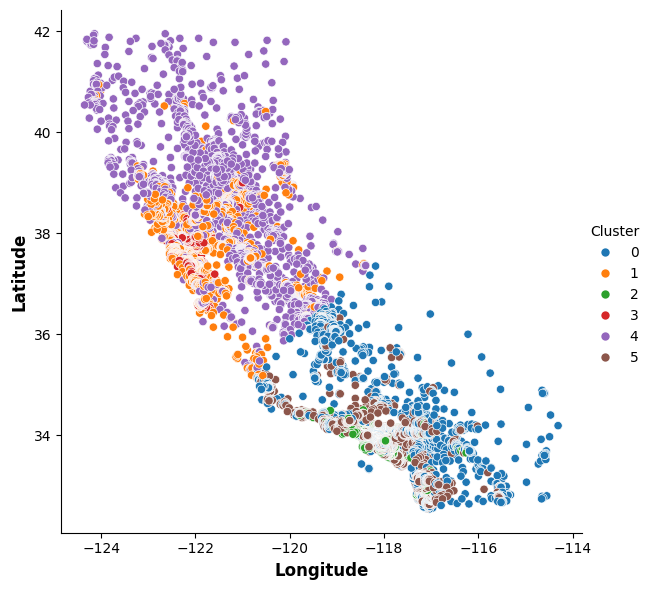

In [10]:
sns.relplot(x="Longitude", y="Latitude", hue="Cluster", data=X, height=6);

Mục tiêu (*target*) trong tập dữ liệu này là **`MedHouseVal`** (giá trị trung vị của nhà ở). 🏡💰  

Biểu đồ **box-plot** dưới đây hiển thị **phân bố của mục tiêu trong từng cụm**. Nếu quá trình phân cụm mang lại thông tin hữu ích, thì các phân bố này phần lớn sẽ **phân tách rõ ràng** theo `MedHouseVal` – và thực tế đúng là như vậy. 📊✅  

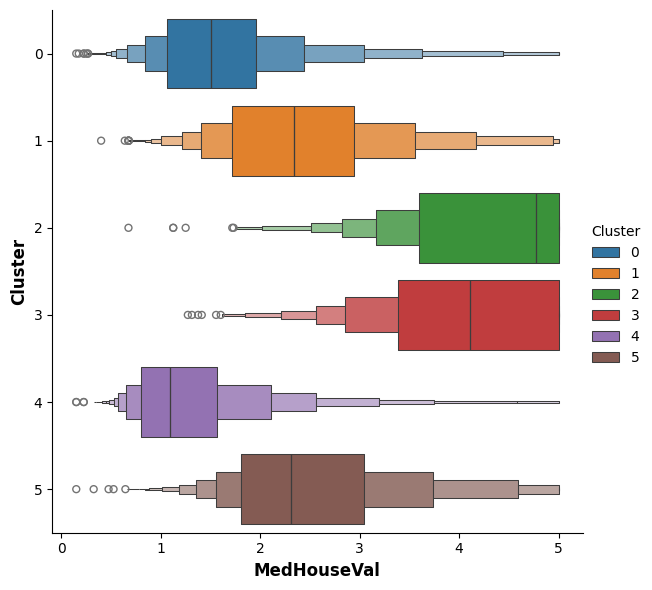

In [11]:
X["MedHouseVal"] = df["MedHouseVal"]
sns.catplot(x="MedHouseVal", y="Cluster", data=X, kind="boxen", height=6, hue="Cluster");

# Đến lượt bạn! 🎯  

[**Thêm một đặc trưng nhãn cụm**](https://www.kaggle.com/kernels/fork/14393920) vào tập dữ liệu *Ames* và khám phá thêm một dạng đặc trưng khác mà phân cụm có thể tạo ra. 🚀🔍  

---




*Have questions or comments? Visit the [course discussion forum](https://www.kaggle.com/learn/feature-engineering/discussion) to chat with other learners.*